<a href="https://colab.research.google.com/github/gluoneros/greenPredEnergy/blob/main/Jp_Probador2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# proyecto Final - TalentoTech
## Modelo para la prediccion de proyectos de energia renobvable en los municipios de Colombia

_El proyecto fue realizado en el marco del curso de Machine Learning TalentoTech_

## Descripcion 🚀

_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._


### Tecnologias utilizdas 📗
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_



* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikit_learn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />


## Autores 😊


* **Monica Garcia**
* **Juan Pablo Cardenas....**
* **Juan Pablo Quevedo....**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl**



## Tareas  ✒️

 1. Importar librerías necesarias[1]
 2. Cargar los Datos
 3. Explore y visualice los datos para obtener información.
 4. Prepare los datos para los algoritmos de machine learning.
 5. Generación de Estadísticas Descriptivas
 6. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
 7. Identificación y manejo de valores atípicos y tendencias en los datos
 8. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
 9. Eliminación de registros con datos faltantes o imputación de valores categóricos.
 10. Cálculo de la correlación entre variables.
 11. Aplicación de técnicas de reducción de dimensionalidad para reducir la dimensionalidad de los datos.
 12. Aplicación de PCA para reducir la dimensionalidad de datasets
 13. Aplicación de técnicas de regresión para predecir valores de variables.
 14. Ajusta tu modelo.
 15. Presente su solución.
 16. Inicie, supervise y mantenga su sistema.

## Preguntas
### 1) ¿Qué municipios son más aptos para desarrollar un proyecto de energías renovables?
### 2)  Cual es la probabilidad de que un municipio de colombia se desarrolle un proyectoe energia renovable?

# 1. Importar librerías necesarias[1]

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [80]:
!pip install sodapy

In [81]:
from sodapy import Socrata

In [82]:
client = Socrata("www.datos.gov.co", None)

# 2. Cargar los Datos

* Dataframe 1- Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [83]:
results1 = client.get("3ebi-d83g", limit=5000)

In [84]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [7]:
#Analisis dataframe
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [85]:
df1 = pd.DataFrame(
    {'municipio': datos1['mpio'],
     #'departamento': datos1['dpto'],
     #'anio': datos1['anio'],
     'potencia_m': datos1['potencia_maxima'],
     'prom_diaria': datos1['prom_diario_horas'],
     'energia_activa': datos1['energia_activa'],
     'energia_reactiva': datos1['energia_reactiva']
    }
)

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         4273 non-null   object
 1   potencia_m        4273 non-null   object
 2   prom_diaria       4273 non-null   object
 3   energia_activa    4273 non-null   object
 4   energia_reactiva  4273 non-null   object
dtypes: object(5)
memory usage: 167.0+ KB


In [87]:
df1.isnull().sum()

,0
municipio,0
potencia_m,0
prom_diaria,0
energia_activa,0
energia_reactiva,0


In [88]:
#pasa  los datos a numericos
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
df1['prom_diaria'] = pd.to_numeric(df1['prom_diaria'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
#df1['anio'] = pd.to_numeric(df1['anio'], errors='coerce')
df1

,municipio,potencia_m,prom_diaria,energia_activa,energia_reactiva
0,PUERTO NARIÑO,286.40,24.00,132215,41907.0
1,TARAPACA (ANM),102.60,10.16,28132,12662.0
2,VIGÍA DEL FUERTE,27.46,4.19,2686,1110.0
3,PROVIDENCIA,2190.28,23.59,1331271,284638.0
4,CARTAGENA DE INDIAS,247.59,10.90,64368,30561.0
...,...,...,...,...,...
4268,BUENAVENTURA,31.23,10.05,7610,3285.0
4269,CARURÚ,87.82,16.39,31775,7881.0
4270,MITÚ,3236.71,23.56,1590470,387197.0
4271,TARAIRA,136.84,13.01,39226,10719.0


In [89]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         4273 non-null   object 
 1   potencia_m        4273 non-null   float64
 2   prom_diaria       4273 non-null   float64
 3   energia_activa    4273 non-null   int64  
 4   energia_reactiva  4273 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 167.0+ KB


<Axes: >

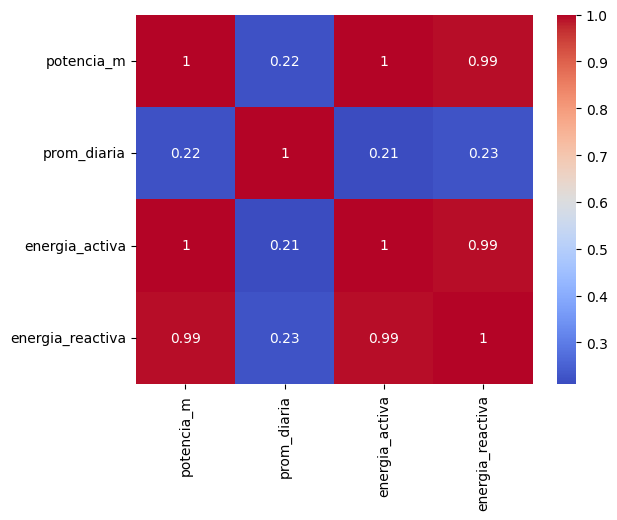

In [90]:
#Analisis de correlacion entre las variables de interes
correlacion1 = df1[['potencia_m',  'prom_diaria', 'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

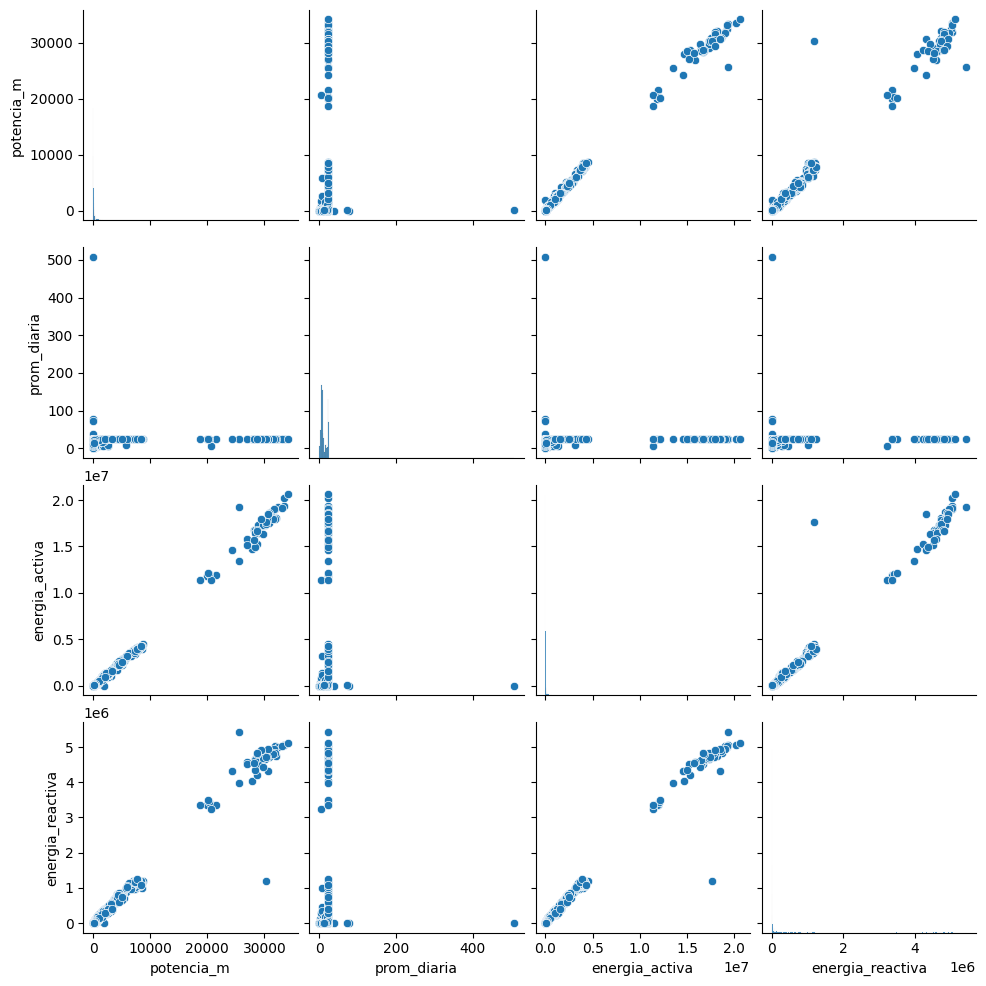

In [91]:
sns.pairplot(df1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb555fc9930>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb555fc9e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb555fc9690>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb555fca3b0>],
 'fliers': [],
 'means': []}

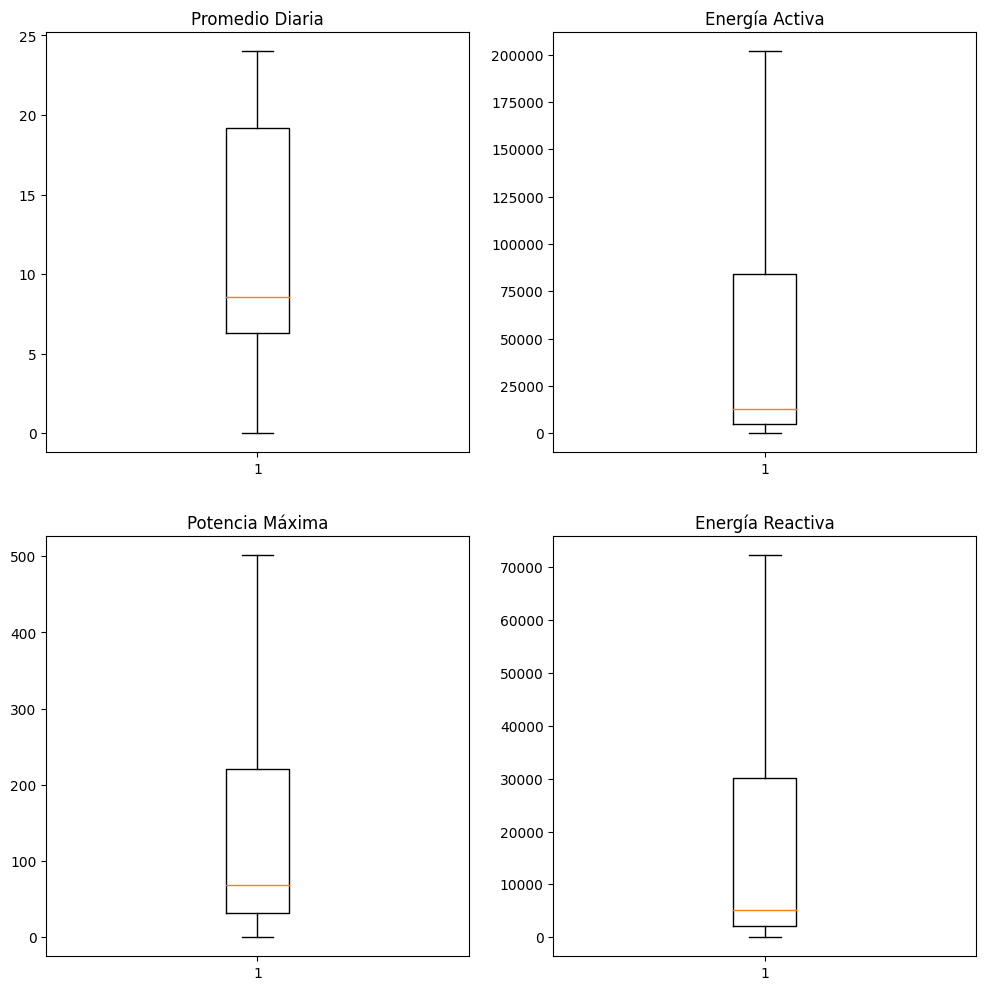

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0][0].set_title('Promedio Diaria')
ax[1][0].set_title('Potencia Máxima')
ax[0][1].set_title('Energía Activa')
ax[1][1].set_title('Energía Reactiva')

#boxplots.
ax[0][0].boxplot(x=df1['prom_diaria'], showfliers=False)
ax[1][0].boxplot(x=df1['potencia_m'], showfliers=False)
ax[0][1].boxplot(x=df1['energia_activa'], showfliers=False)
ax[1][1].boxplot(x=df1['energia_reactiva'], showfliers=False)


* Dataframe 2 - Consumo percapita de energia electrica segun su fuente en Colombia-our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)


* Dataframe 3 -  FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

In [93]:
results2 = client.get("vy9n-w6hc", limit=3000)
datos2 = pd.DataFrame.from_records(results2)
datos2.head()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


In [94]:
datos2['tipo'].describe()

,tipo
count,158
unique,2
top,Solar
freq,145


In [95]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   proyecto                158 non-null    object
 1   tipo                    158 non-null    object
 2   capacidad               158 non-null    object
 3   departamento            158 non-null    object
 4   municipio               158 non-null    object
 5   codigo_departamento     158 non-null    object
 6   codigo_municipio        158 non-null    object
 7   fecha_estimada_fpo      158 non-null    object
 8   energia_kwh_d_a         158 non-null    object
 9   usuarios                158 non-null    object
 10  inversi_n_estimada_cop  158 non-null    object
 11  empleos_estimados       158 non-null    object
 12  emisiones_co2_ton_a_o   158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


In [102]:
df2 = pd.DataFrame(
    {'municipio': datos2['municipio'],
     #'capacidad': datos2['capacidad'],
     'tipo': datos2['tipo'],
     #'usuarios': datos2['usuarios'],
     #'energía': datos2['energia_kwh_d_a'],
     #'emisiones': datos2['emisiones_co2_ton_a_o'],
     'inversion': datos2['inversi_n_estimada_cop']
    }
)


In [103]:
df2.shape

(158, 3)

In [104]:
df2.isnull().sum()

,0
municipio,0
tipo,0
inversion,0


In [105]:
df2.dtypes

,0
municipio,object
tipo,object
inversion,object


In [210]:
#pasamos los datos3 a numericos
for col in ['inversion']:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
df2

,municipio,tipo,inversion
0,URIBIA,Eólico,79206000000
1,YUMBO,Solar,42140000000
2,SANTA ROSA,Solar,34658000000
3,EL PASO,Solar,288100000000
4,CASTILLA LA NUEVA,Solar,86000000000
...,...,...,...
153,"""""",Solar,22275000000
154,"""""",Solar,14850000000
155,BARRANCABERMEJA,Solar,78750000000
156,VILLAVICENCIO,Solar,8170000000


<Axes: >

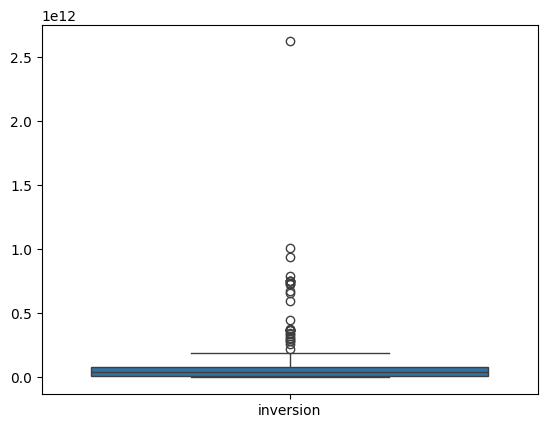

In [108]:
cajas = df2[['inversion']]
sns.boxplot(cajas)

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  158 non-null    object
 1   tipo       158 non-null    object
 2   inversion  158 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


* Dataframe 3 -  Velocidad del viento en los municipios de colombia
[vínculo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Velocidad-Viento/sgfv-3yp8/about_data)

In [111]:
results3 = client.get("sgfv-3yp8", limit=3000)

In [112]:
datos3 = pd.DataFrame.from_records(results3)
datos3

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0021206950,0103,2016-11-28T22:50:00.000,1,PARAMO GUACHENEQUE - AUT,CUNDINAMARCA,VILLAPINZÓN,ALTO MAGDALENA,5.236055556,-73.52508333,Velocidad Viento (10 min),m/s
1,0024025501,0103,2019-07-23T01:00:00.000,1.414449,ALBERTO SANTOS - AUT,SANTANDER,SOCORRO,SOGAMOSO,6.493052778,-73.22111111,Velocidad Viento (10 min),m/s
2,0023125160,0103,2009-10-01T20:00:00.000,1.2,SAN PABLO DE BORBUR - AUT,BOYACÁ,SAN PABLO DE BORBUR,MEDIO MAGDALENA,5.647027778,-74.07130556,Velocidad Viento (10 min),m/s
3,0029065000,0103,2018-07-10T16:40:00.000,3.2,MEDIA LUNA - AUT,MAGDALENA,PIVIJAI,BAJO MAGDALENA,10.51002778,-74.50666667,Velocidad Viento (10 min),m/s
4,0023125501,0103,2018-05-26T22:40:00.000,0.9398322,PAUNA - AUT,BOYACÁ,PAUNA,MEDIO MAGDALENA,5.657130556,-73.96032778,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0021235030,0103,2005-10-27T11:10:00.000,2.9,UNIVERSIDAD DE CUNDINAMARCA - AUT,CUNDINAMARCA,GIRARDOT,ALTO MAGDALENA,4.305333333,-74.80811111,Velocidad Viento (10 min),m/s
2996,0023085270,0103,2015-05-27T19:20:00.000,2,APTO J.M CORDOVA TX GPRS,ANTIOQUIA,RIONEGRO,MEDIO MAGDALENA,6.169,-75.426,Velocidad Viento (10 min),m/s
2997,0026135310,0103,2008-03-28T18:10:00.000,2.8,STA ROSA - En Siniestro,RISARALDA,SANTA ROSA DE CABAL,CAUCA,4.847,-75.636,Velocidad Viento (10 min),m/s
2998,0016055120,0103,2018-02-01T11:00:00.000,4,AGUAS DE LA VIRGEN - AUT,NORTE DE SANTANDER,OCAÑA,CATATUMBO,8.227694444,-73.3975,Velocidad Viento (10 min),m/s


In [113]:
df3 = pd.DataFrame(
    {'municipio': datos3['municipio'],
     'velocidad_viento': datos3['valorobservado']
    }
)
df3

,municipio,velocidad_viento
0,VILLAPINZÓN,1
1,SOCORRO,1.414449
2,SAN PABLO DE BORBUR,1.2
3,PIVIJAI,3.2
4,PAUNA,0.9398322
...,...,...
2995,GIRARDOT,2.9
2996,RIONEGRO,2
2997,SANTA ROSA DE CABAL,2.8
2998,OCAÑA,4


In [114]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         3000 non-null   object
 1   velocidad_viento  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [115]:
df3.isnull().sum()

,0
municipio,0
velocidad_viento,0


In [116]:
#pasar la columna velocidad_viento a numérico
df3['velocidad_viento'] = pd.to_numeric(df3['velocidad_viento'], errors='coerce')

In [117]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         3000 non-null   object 
 1   velocidad_viento  3000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


* Dataframe 4 -  Dias con lluvia en los municipios de colombia\
  INFORMACIÓN GENERAL ESTACIONES,,,,,,,,,NORMAL CLIMATOLÓGICA ESTÁNDAR DE No DE DÍAS CON LLUVIA ≥ 1 mm PARA EL PERIODO 1991-2020,,,,,,,,,,,,,  Cumplen la directriz No 1203 del 2017 de la OMM,\
[vínculo](http://archivo.ideam.gov.co/web/tiempo-y-clima/clima)

In [118]:
datos4 = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')


In [119]:
datos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CODIGO             1445 non-null   int64 
 1   CATEGORIA          1445 non-null   object
 2   ESTACIÓN           1445 non-null   object
 3   MUNICIPIO          1445 non-null   object
 4   DEPARTAMENTO       1445 non-null   object
 5   AO                 1445 non-null   int64 
 6   ALTITUD (m)        1445 non-null   int64 
 7   LONGITUD           1445 non-null   object
 8   LATITUD            1445 non-null   object
 9   ENE                1445 non-null   object
 10  FEB                1445 non-null   object
 11  MAR                1445 non-null   object
 12  ABR                1445 non-null   object
 13  MAY                1445 non-null   object
 14  JUN                1445 non-null   object
 15  JUL                1445 non-null   object
 16  AGO                1445 non-null   object


In [120]:
df4 = pd.DataFrame(
    {'municipio': datos4['MUNICIPIO'],
     'dias_lluvia': datos4['ANUAL']
     }
)
df4

,municipio,dias_lluvia
0,El Encanto,"191,7"
1,El Encanto,"191,1"
2,La Pedrera,"216,0"
3,La Pedrera,"161,8"
4,La Pedrera,"204,0"
...,...,...
1440,Puerto Carreño,"133,2"
1441,Puerto Carreño,"130,7"
1442,Santa Rosalía,"98,7"
1443,Santa Rosalía,"113,4"


In [121]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   municipio    1445 non-null   object
 1   dias_lluvia  1445 non-null   object
dtypes: object(2)
memory usage: 22.7+ KB


In [122]:
 # elimina espacios en blanco
df4['dias_lluvia'] = df4['dias_lluvia'].str.strip()
df4['municipio'] = df4['municipio'].str.strip()

In [123]:
 # Cambia comas por puntos en el campo 'dias_lluvia'
df4['dias_lluvia'] = df4['dias_lluvia'].str.replace(',', '.', regex=False)

In [124]:
# conversion a numerico
df4['dias_lluvia'] = pd.to_numeric(df4['dias_lluvia'], errors='coerce')

In [125]:
#pasa municipio a mayusculas
df4['municipio'] = df4['municipio'].str.upper()
df4

,municipio,dias_lluvia
0,EL ENCANTO,191.7
1,EL ENCANTO,191.1
2,LA PEDRERA,216.0
3,LA PEDRERA,161.8
4,LA PEDRERA,204.0
...,...,...
1440,PUERTO CARREÑO,133.2
1441,PUERTO CARREÑO,130.7
1442,SANTA ROSALÍA,98.7
1443,SANTA ROSALÍA,113.4


Unificar datos de poblaciones y viento

In [126]:
df_clima = pd.merge(df4, df3, on='municipio', how='left')
df_clima

,municipio,dias_lluvia,velocidad_viento
0,EL ENCANTO,191.7,NaN
1,EL ENCANTO,191.1,NaN
2,LA PEDRERA,216.0,NaN
3,LA PEDRERA,161.8,NaN
4,LA PEDRERA,204.0,NaN
...,...,...,...
7520,PUERTO CARREÑO,133.2,NaN
7521,PUERTO CARREÑO,130.7,NaN
7522,SANTA ROSALÍA,98.7,NaN
7523,SANTA ROSALÍA,113.4,NaN


In [127]:
df_clima.isnull().sum()

,0
municipio,0
dias_lluvia,0
velocidad_viento,914


<Axes: xlabel='velocidad_viento'>

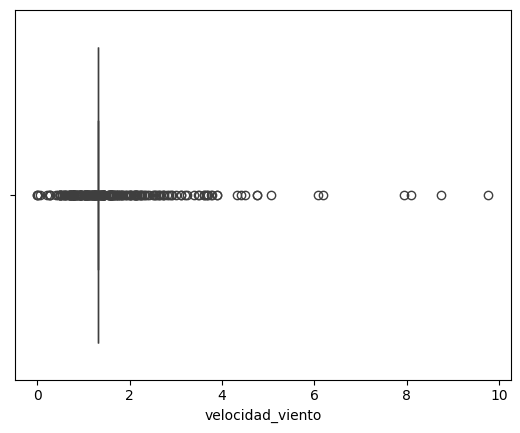

In [211]:
sns.boxplot(x=df_clima['velocidad_viento'])

<Axes: xlabel='velocidad_viento', ylabel='Count'>

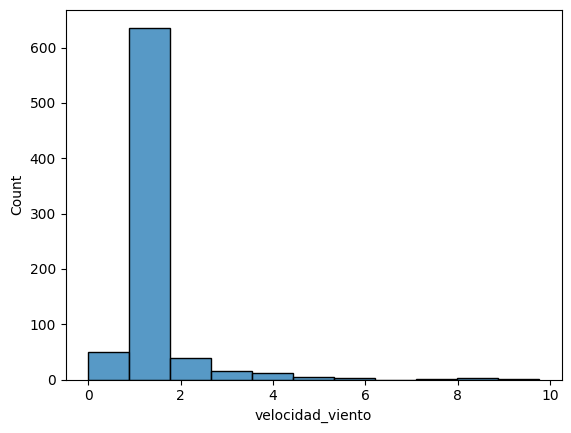

In [213]:
sns.histplot(df_clima['velocidad_viento'])

In [128]:
df_clima['velocidad_viento'].fillna(df3['velocidad_viento'].median(), inplace=True)
df_clima

<ipython-input-128-399fbe95d109>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clima['velocidad_viento'].fillna(df3['velocidad_viento'].median(), inplace=True)


,municipio,dias_lluvia,velocidad_viento
0,EL ENCANTO,191.7,1.315613
1,EL ENCANTO,191.1,1.315613
2,LA PEDRERA,216.0,1.315613
3,LA PEDRERA,161.8,1.315613
4,LA PEDRERA,204.0,1.315613
...,...,...,...
7520,PUERTO CARREÑO,133.2,1.315613
7521,PUERTO CARREÑO,130.7,1.315613
7522,SANTA ROSALÍA,98.7,1.315613
7523,SANTA ROSALÍA,113.4,1.315613


In [129]:
df_clima= df_clima.groupby('municipio').agg({'velocidad_viento': 'mean', 'dias_lluvia': 'mean'}).reset_index()
df_clima

,municipio,velocidad_viento,dias_lluvia
0,ABEJORRAL,1.315613,177.800000
1,ABRIAQUÍ,1.315613,200.600000
2,ACACÍAS,1.315613,195.700000
3,ACANDÍ,1.200000,150.500000
4,ACEVEDO,1.887494,157.650000
...,...,...,...
756,ZONA BANANERA,0.900000,52.866667
757,ÁBREGO,1.600000,107.433333
758,ÍQUIRA,1.315613,166.500000
759,ÚMBITA,1.315613,170.200000


<Axes: >

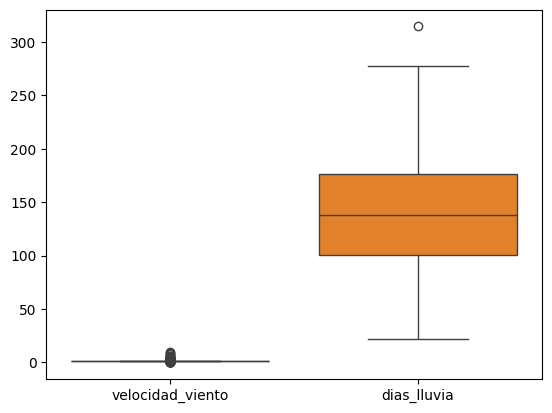

In [214]:
climas = df_clima[['velocidad_viento', 'dias_lluvia']]
sns.boxplot(climas)

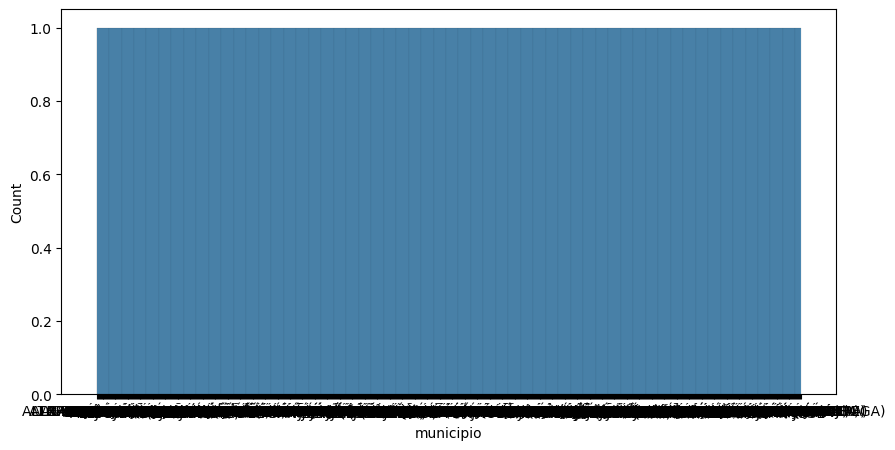

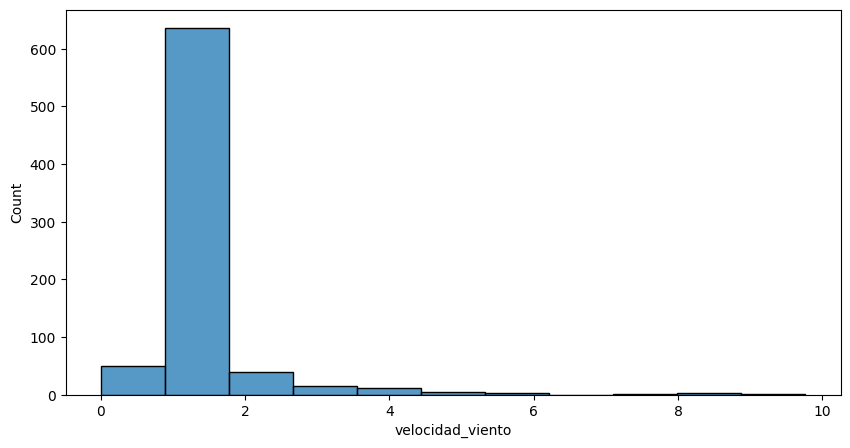

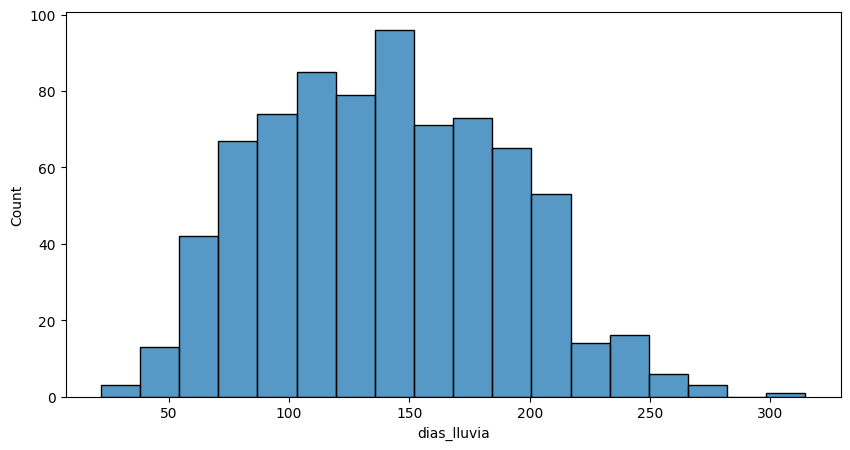

In [215]:
for col in df_clima.columns:

  plt.figure(figsize=(10, 5))

  sns.histplot(df_clima[col])

In [224]:
df_unificado1 = pd.merge(df1, df2, on='municipio', how='left')
df_unificado1

,municipio,potencia_m,prom_diaria,energia_activa,energia_reactiva,tipo,inversion
0,PUERTO NARIÑO,286.40,24.00,132215,41907.0,NaN,NaN
1,TARAPACA (ANM),102.60,10.16,28132,12662.0,NaN,NaN
2,VIGÍA DEL FUERTE,27.46,4.19,2686,1110.0,NaN,NaN
3,PROVIDENCIA,2190.28,23.59,1331271,284638.0,NaN,NaN
4,CARTAGENA DE INDIAS,247.59,10.90,64368,30561.0,Solar,1.290000e+10
...,...,...,...,...,...,...,...
4996,BUENAVENTURA,31.23,10.05,7610,3285.0,NaN,NaN
4997,CARURÚ,87.82,16.39,31775,7881.0,NaN,NaN
4998,MITÚ,3236.71,23.56,1590470,387197.0,NaN,NaN
4999,TARAIRA,136.84,13.01,39226,10719.0,NaN,NaN


In [225]:
df_unificado1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         5001 non-null   object 
 1   potencia_m        5001 non-null   float64
 2   prom_diaria       5001 non-null   float64
 3   energia_activa    5001 non-null   int64  
 4   energia_reactiva  5001 non-null   float64
 5   tipo              1207 non-null   object 
 6   inversion         1207 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 273.6+ KB


In [226]:
df_unificado1.isnull().sum()

,0
municipio,0
potencia_m,0
prom_diaria,0
energia_activa,0
energia_reactiva,0
tipo,3794
inversion,3794


In [227]:

df_unificado1['inversion'].fillna(df2['inversion'].median(), inplace=True)

df_unificado1

<ipython-input-227-d02c82120477>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unificado1['inversion'].fillna(df2['inversion'].median(), inplace=True)


,municipio,potencia_m,prom_diaria,energia_activa,energia_reactiva,tipo,inversion
0,PUERTO NARIÑO,286.40,24.00,132215,41907.0,NaN,3.963250e+10
1,TARAPACA (ANM),102.60,10.16,28132,12662.0,NaN,3.963250e+10
2,VIGÍA DEL FUERTE,27.46,4.19,2686,1110.0,NaN,3.963250e+10
3,PROVIDENCIA,2190.28,23.59,1331271,284638.0,NaN,3.963250e+10
4,CARTAGENA DE INDIAS,247.59,10.90,64368,30561.0,Solar,1.290000e+10
...,...,...,...,...,...,...,...
4996,BUENAVENTURA,31.23,10.05,7610,3285.0,NaN,3.963250e+10
4997,CARURÚ,87.82,16.39,31775,7881.0,NaN,3.963250e+10
4998,MITÚ,3236.71,23.56,1590470,387197.0,NaN,3.963250e+10
4999,TARAIRA,136.84,13.01,39226,10719.0,NaN,3.963250e+10


In [228]:
df_unificado2 = pd.merge(df_clima, df_unificado1, on='municipio', how='left')
df_unificado2

,municipio,velocidad_viento,dias_lluvia,potencia_m,prom_diaria,energia_activa,energia_reactiva,tipo,inversion
0,ABEJORRAL,1.315613,177.800000,NaN,NaN,NaN,NaN,NaN,NaN
1,ABRIAQUÍ,1.315613,200.600000,NaN,NaN,NaN,NaN,NaN,NaN
2,ACACÍAS,1.315613,195.700000,NaN,NaN,NaN,NaN,NaN,NaN
3,ACANDÍ,1.200000,150.500000,1554.78,18.53,598738.0,171032.0,NaN,3.963250e+10
4,ACANDÍ,1.200000,150.500000,878.68,21.41,420977.0,142002.0,NaN,3.963250e+10
...,...,...,...,...,...,...,...,...,...
3714,ZONA BANANERA,0.900000,52.866667,NaN,NaN,NaN,NaN,NaN,NaN
3715,ÁBREGO,1.600000,107.433333,NaN,NaN,NaN,NaN,NaN,NaN
3716,ÍQUIRA,1.315613,166.500000,NaN,NaN,NaN,NaN,NaN,NaN
3717,ÚMBITA,1.315613,170.200000,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
df_unificado2.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
potencia_m,730
prom_diaria,730
energia_activa,730
energia_reactiva,730
tipo,2557
inversion,730


In [230]:
df_viabilidad = df_unificado2.dropna(subset =['potencia_m'])
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,prom_diaria,energia_activa,energia_reactiva,tipo,inversion
3,ACANDÍ,1.200000,150.500000,1554.78,18.53,598738.0,171032.00,NaN,3.963250e+10
4,ACANDÍ,1.200000,150.500000,878.68,21.41,420977.0,142002.00,NaN,3.963250e+10
5,ACANDÍ,1.200000,150.500000,77.66,9.21,17322.0,6530.00,NaN,3.963250e+10
6,ACANDÍ,1.200000,150.500000,1579.60,19.37,682186.0,197644.00,NaN,3.963250e+10
7,ACANDÍ,1.200000,150.500000,894.96,21.03,403800.0,128896.00,NaN,3.963250e+10
...,...,...,...,...,...,...,...,...,...
3662,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,2.812500e+11
3663,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,3.706880e+11
3664,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,7.416380e+11
3665,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,9.375000e+11


In [231]:
df_viabilidad['viabilidad'] = ((df_viabilidad['dias_lluvia'] < 150) | (df_viabilidad['velocidad_viento'] > 3.5)) .astype(int)
df_viabilidad

<ipython-input-231-1a8eddb00455>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viabilidad['viabilidad'] = ((df_viabilidad['dias_lluvia'] < 150) | (df_viabilidad['velocidad_viento'] > 3.5)) .astype(int)


,municipio,velocidad_viento,dias_lluvia,potencia_m,prom_diaria,energia_activa,energia_reactiva,tipo,inversion,viabilidad
3,ACANDÍ,1.200000,150.500000,1554.78,18.53,598738.0,171032.00,NaN,3.963250e+10,0
4,ACANDÍ,1.200000,150.500000,878.68,21.41,420977.0,142002.00,NaN,3.963250e+10,0
5,ACANDÍ,1.200000,150.500000,77.66,9.21,17322.0,6530.00,NaN,3.963250e+10,0
6,ACANDÍ,1.200000,150.500000,1579.60,19.37,682186.0,197644.00,NaN,3.963250e+10,0
7,ACANDÍ,1.200000,150.500000,894.96,21.03,403800.0,128896.00,NaN,3.963250e+10,0
...,...,...,...,...,...,...,...,...,...,...
3662,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,2.812500e+11,1
3663,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,3.706880e+11,1
3664,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,7.416380e+11,1
3665,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,9.375000e+11,1


In [232]:
df_viabilidad['tipo'].fillna('Ninguno', inplace=True)
df_viabilidad

<ipython-input-232-665dc282e6cb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_viabilidad['tipo'].fillna('Ninguno', inplace=True)
<ipython-input-232-665dc282e6cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viabilidad['tipo'].fillna('Ninguno', inplace=True)


,municipio,velocidad_viento,dias_lluvia,potencia_m,prom_diaria,energia_activa,energia_reactiva,tipo,inversion,viabilidad
3,ACANDÍ,1.200000,150.500000,1554.78,18.53,598738.0,171032.00,Ninguno,3.963250e+10,0
4,ACANDÍ,1.200000,150.500000,878.68,21.41,420977.0,142002.00,Ninguno,3.963250e+10,0
5,ACANDÍ,1.200000,150.500000,77.66,9.21,17322.0,6530.00,Ninguno,3.963250e+10,0
6,ACANDÍ,1.200000,150.500000,1579.60,19.37,682186.0,197644.00,Ninguno,3.963250e+10,0
7,ACANDÍ,1.200000,150.500000,894.96,21.03,403800.0,128896.00,Ninguno,3.963250e+10,0
...,...,...,...,...,...,...,...,...,...,...
3662,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,2.812500e+11,1
3663,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,3.706880e+11,1
3664,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,7.416380e+11,1
3665,URIBIA,4.752632,21.846667,267.36,5.42,40008.0,8714.00,Eólico,9.375000e+11,1


In [221]:
'''df_final = df_viabilidad.groupby('municipio').agg({
    'velocidad_viento': 'mean',
    'potencia_m': 'mean',
    'prom_diaria': 'mean',
    'energia_activa': 'mean',
    'energia_reactiva': 'mean',
    'dias_lluvia': 'mean',
    #'inversion': 'mean',
    'viabilidad': 'first',
    #'tipo': 'first'
}).reset_index()
df_final'''

"df_final = df_viabilidad.groupby('municipio').agg({\n    'velocidad_viento': 'mean',\n    'potencia_m': 'mean',\n    'prom_diaria': 'mean',\n    'energia_activa': 'mean',\n    'energia_reactiva': 'mean',\n    'dias_lluvia': 'mean',\n    #'inversion': 'mean',\n    'viabilidad': 'first',\n    #'tipo': 'first'\n}).reset_index()\ndf_final"

In [233]:
df_viabilidad['viabilidad'].value_counts()

,count
viabilidad,
0,1630
1,1359


<Axes: >

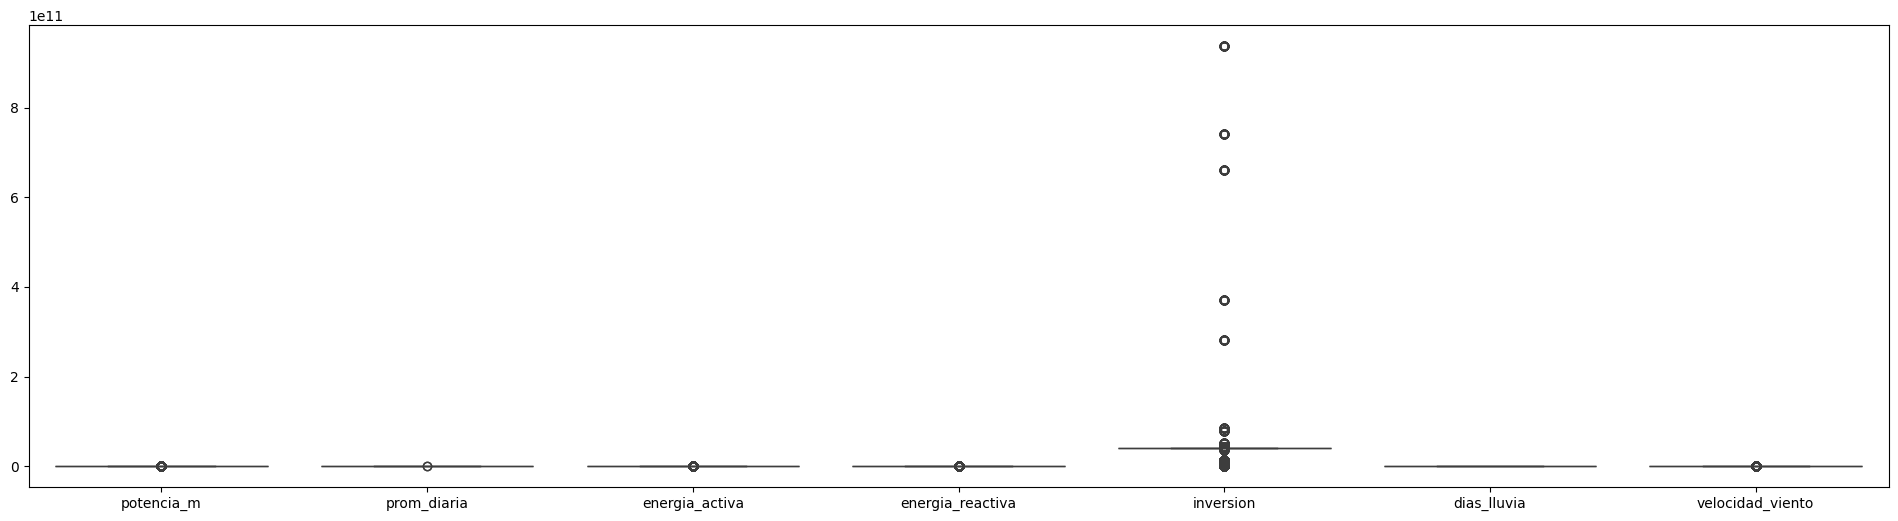

In [235]:
plt.figure(figsize=(24, 6))
variables = df_viabilidad[['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva','inversion', 'dias_lluvia', 'velocidad_viento']]
sns.boxplot(variables)

In [236]:
from sklearn.preprocessing import RobustScaler
escalador = RobustScaler()

df_viabilidad['inversion'] = escalador.fit_transform(df_viabilidad[['inversion']])
df_viabilidad['potencia_m'] = escalador.fit_transform(df_viabilidad[['potencia_m']])
df_viabilidad['prom_diaria'] = escalador.fit_transform(df_viabilidad[['prom_diaria']])
df_viabilidad['dias_lluvia'] = escalador.fit_transform(df_viabilidad[['dias_lluvia']])
df_viabilidad['energia_activa'] = escalador.fit_transform(df_viabilidad[['energia_activa']])
df_viabilidad['energia_reactiva'] = escalador.fit_transform(df_viabilidad[['energia_reactiva']])

<ipython-input-236-c2587f491477>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viabilidad['inversion'] = escalador.fit_transform(df_viabilidad[['inversion']])
<ipython-input-236-c2587f491477>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viabilidad['potencia_m'] = escalador.fit_transform(df_viabilidad[['potencia_m']])
<ipython-input-236-c2587f491477>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

<Axes: >

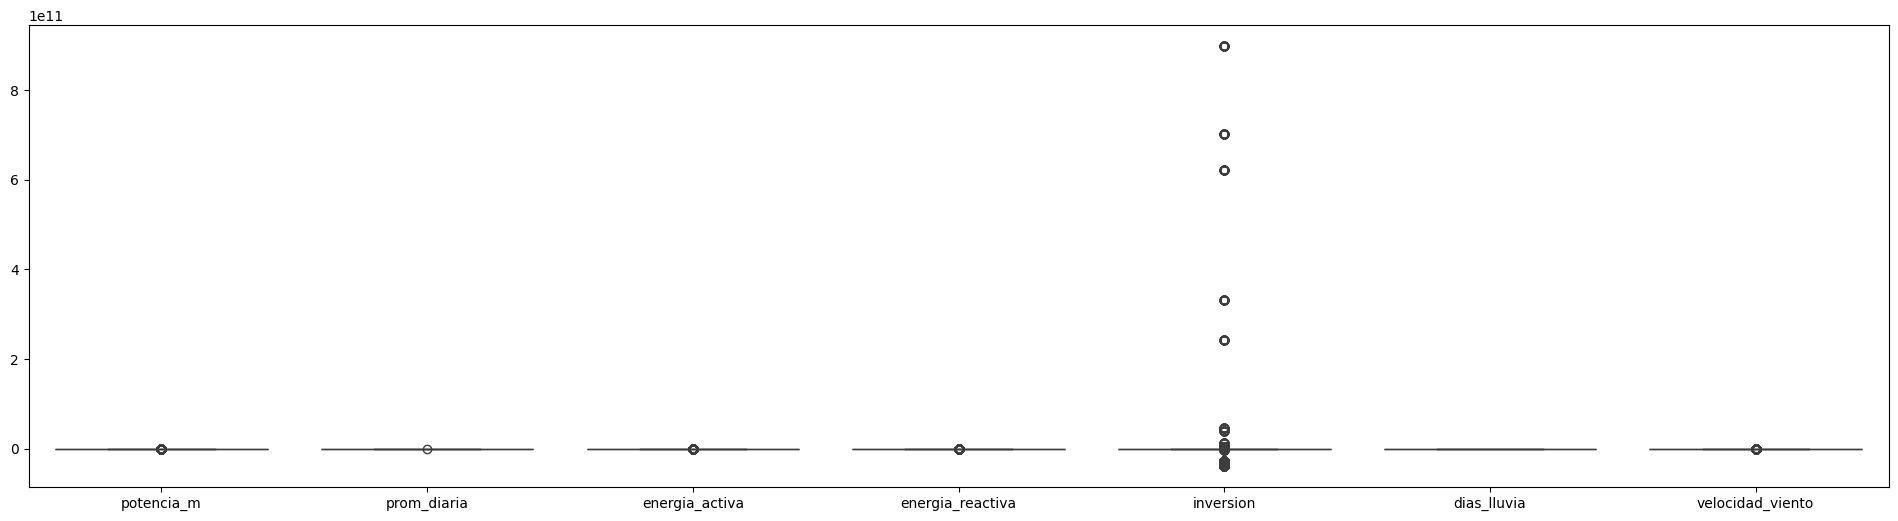

In [239]:
plt.figure(figsize=(24, 6))
vari = df_viabilidad[['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva','inversion', 'dias_lluvia', 'velocidad_viento']]
sns.boxplot(vari, whis=3)

<ipython-input-184-20336d9b226d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viabilidad['energia_activa'] = winsorize(en_a_winsorized, limits=[0.05, 0.05])
<ipython-input-184-20336d9b226d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viabilidad['energia_reactiva'] = winsorize(en_rea_winsorized, limits=[0.05, 0.05])


<Axes: >

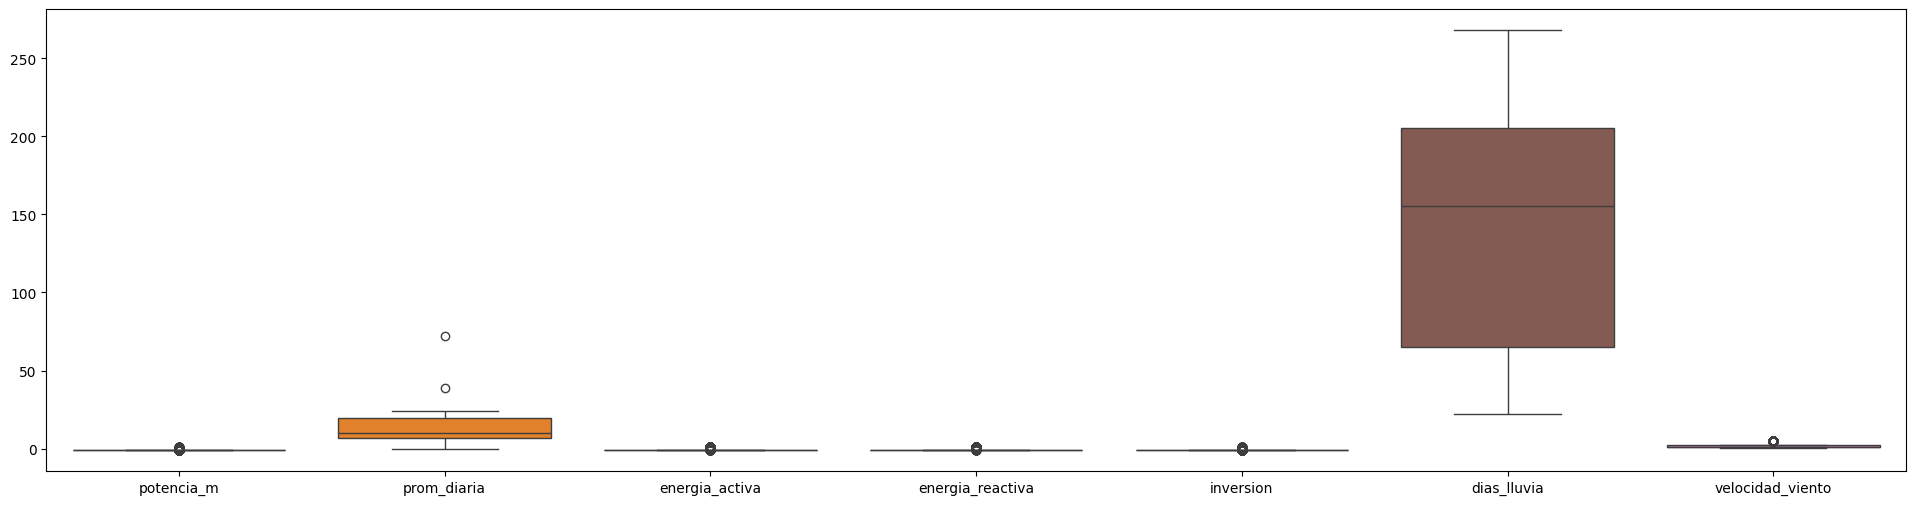

In [184]:
'''from scipy.stats.mstats import winsorize

en_a_winsorized = df_viabilidad['energia_activa'].copy()
df_viabilidad['energia_activa'] = winsorize(en_a_winsorized, limits=[0.05, 0.05])

en_rea_winsorized = df_viabilidad['energia_reactiva'].copy()
df_viabilidad['energia_reactiva'] = winsorize(en_rea_winsorized, limits=[0.05, 0.05])

plt.figure(figsize=(24, 6))
v = df_viabilidad[['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva','inversion', 'dias_lluvia', 'velocidad_viento']]
sns.boxplot(v)'''

<Axes: >

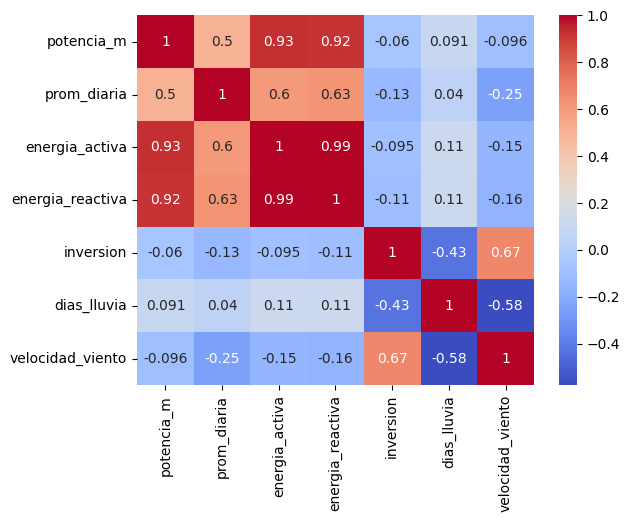

In [208]:
correlacion = df_viabilidad[['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva','inversion', 'dias_lluvia', 'velocidad_viento']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

Modelo de clasificación NAIVE BAYES

In [209]:
x = df_viabilidad[['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva','inversion', 'dias_lluvia', 'velocidad_viento']]
y = df_viabilidad['viabilidad']

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)

#Modelo
naive_model = GaussianNB()
naive_model.fit(x_entrenamiento, y_entrenamiento)
predicciones = naive_model.predict(x_prueba)


#Evaluación del modelo
print(classification_report(y_prueba, predicciones))
print('Accuracy:', accuracy_score(y_prueba, predicciones))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       328
           1       0.99      0.85      0.91       270

    accuracy                           0.93       598
   macro avg       0.94      0.92      0.93       598
weighted avg       0.93      0.93      0.93       598

Accuracy: 0.9280936454849499


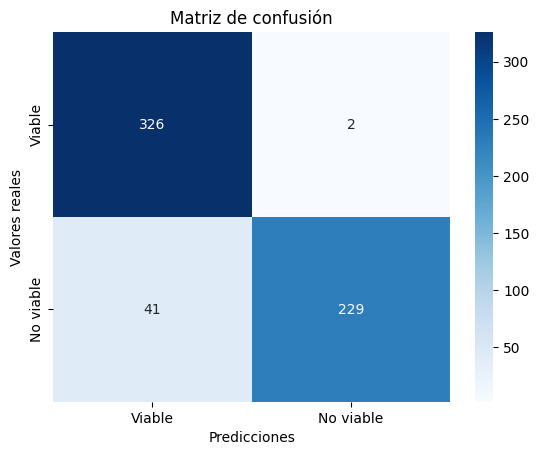

In [198]:
matriz1 = confusion_matrix(y_prueba, predicciones)
labels = ['Viable', 'No viable']

sns.heatmap(matriz1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

Modelo de Clasificación REGRESIÓN LOGÍSTICA

In [195]:
x2 = df_viabilidad[['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva','inversion', 'dias_lluvia', 'velocidad_viento']]
y2 = df_viabilidad['viabilidad']

x2_entrenamiento, x2_prueba, y2_entrenamiento, y2_prueba = train_test_split(x2, y2, test_size=0.2, random_state=42)

#Modelo
logistic_model = LogisticRegression()
logistic_model.fit(x2_entrenamiento, y2_entrenamiento)
predicciones2 = logistic_model.predict(x2_prueba)


#Evaluación del modelo
print(classification_report(y2_prueba, predicciones2))
print('Accuracy:', accuracy_score(y2_prueba, predicciones2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       270

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


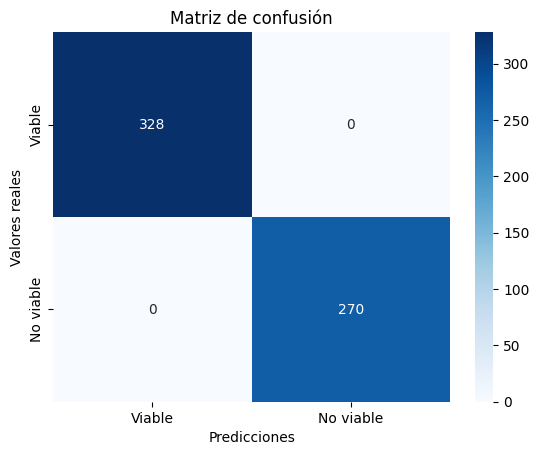

In [199]:
matriz2 = confusion_matrix(y2_prueba, predicciones2)
labels = ['Viable', 'No viable']

sns.heatmap(matriz2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

Modelo de clasificación RANDOM FOREST REGRESSOR

In [197]:
x3 = df_viabilidad[['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva','inversion', 'dias_lluvia', 'velocidad_viento']]
y3 = df_viabilidad['viabilidad']

x3_entrenamiento, x3_prueba, y3_entrenamiento, y3_prueba = train_test_split(x3, y3, test_size=0.2, random_state=42)

#Modelo
forest_model = RandomForestClassifier()
forest_model.fit(x3_entrenamiento, y3_entrenamiento)
predicciones3 = forest_model.predict(x3_prueba)


#Evaluación del modelo
print(classification_report(y3_prueba, predicciones3))
print('Accuracy:', accuracy_score(y3_prueba, predicciones3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       270

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598

Accuracy: 1.0


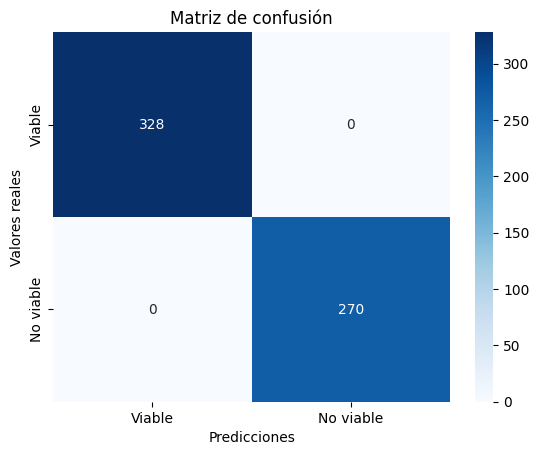

In [200]:
matriz3 = confusion_matrix(y2_prueba, predicciones2)
labels = ['Viable', 'No viable']

sns.heatmap(matriz3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()